In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data\kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

data\kaggle\input\COVID19_line_list_data.csv
data\kaggle\input\COVID19_open_line_list.csv
data\kaggle\input\covid_19_data.csv
data\kaggle\input\time_series_covid_19_confirmed.csv
data\kaggle\input\time_series_covid_19_deaths.csv
data\kaggle\input\time_series_covid_19_recovered.csv


In [59]:
#load data
covid_19_data = pd.read_csv('data\kaggle\input\covid_19_data.csv', header=0, index_col=0, parse_dates=['ObservationDate'], squeeze=True)
covid_19_line_list_data = pd.read_csv('data\kaggle\input\COVID19_line_list_data.csv', header=0, index_col=0, parse_dates=['reporting date'], squeeze=True)
covid_19_open_line_list = pd.read_csv('data\kaggle\input\COVID19_open_line_list.csv', header=0, index_col=0, parse_dates=['date_confirmation'], squeeze=True)

In [50]:
#visualization
#covid_19_data.head()
#covid_19_line_list_data.head()

In [95]:
#get Italy data
_COUNTRY_covid_19_data = 'Mainland China'
covid_19_data_countryFiltered = covid_19_data[covid_19_data['Country/Region'].eq(_COUNTRY_covid_19_data)]
if (_COUNTRY_covid_19_data == 'Mainland China'):
    #for Mainland China we have the data grouped by cities; here cumulative data are grouped per Country (as for Italy and others Countries)
    #Ex. 
    #806,02/05/2020,,France,2020-02-01T01:52:40,6.0,0.0,0.0
    #815,02/05/2020,,Italy,2020-01-31T08:15:53,2.0,0.0,0.0
    #826,02/05/2020,Tibet,Mainland China,2020-02-01T01:52:40,1.0,0.0,0.0
    #837,02/06/2020,Hubei,Mainland China,2020-02-06T23:23:02,22112.0,618.0,817.0
    aggregate = covid_19_data_countryFiltered.groupby('ObservationDate').sum()
    aggregate = aggregate.reset_index()
    covid_19_data_countryFiltered = aggregate
_COUTNRY_covid_19_line_list_data= 'China'
covid_19_line_list_data_countryFiltered = covid_19_line_list_data[covid_19_line_list_data['country'].eq(_COUTNRY_covid_19_line_list_data)]
_COUTNRY_covid_19_open_line_list = 'China'
covid_19_open_line_list_countryFiltered = covid_19_open_line_list[covid_19_open_line_list['country'].eq(_COUTNRY_covid_19_open_line_list)]

<IPython.core.display.Javascript object>


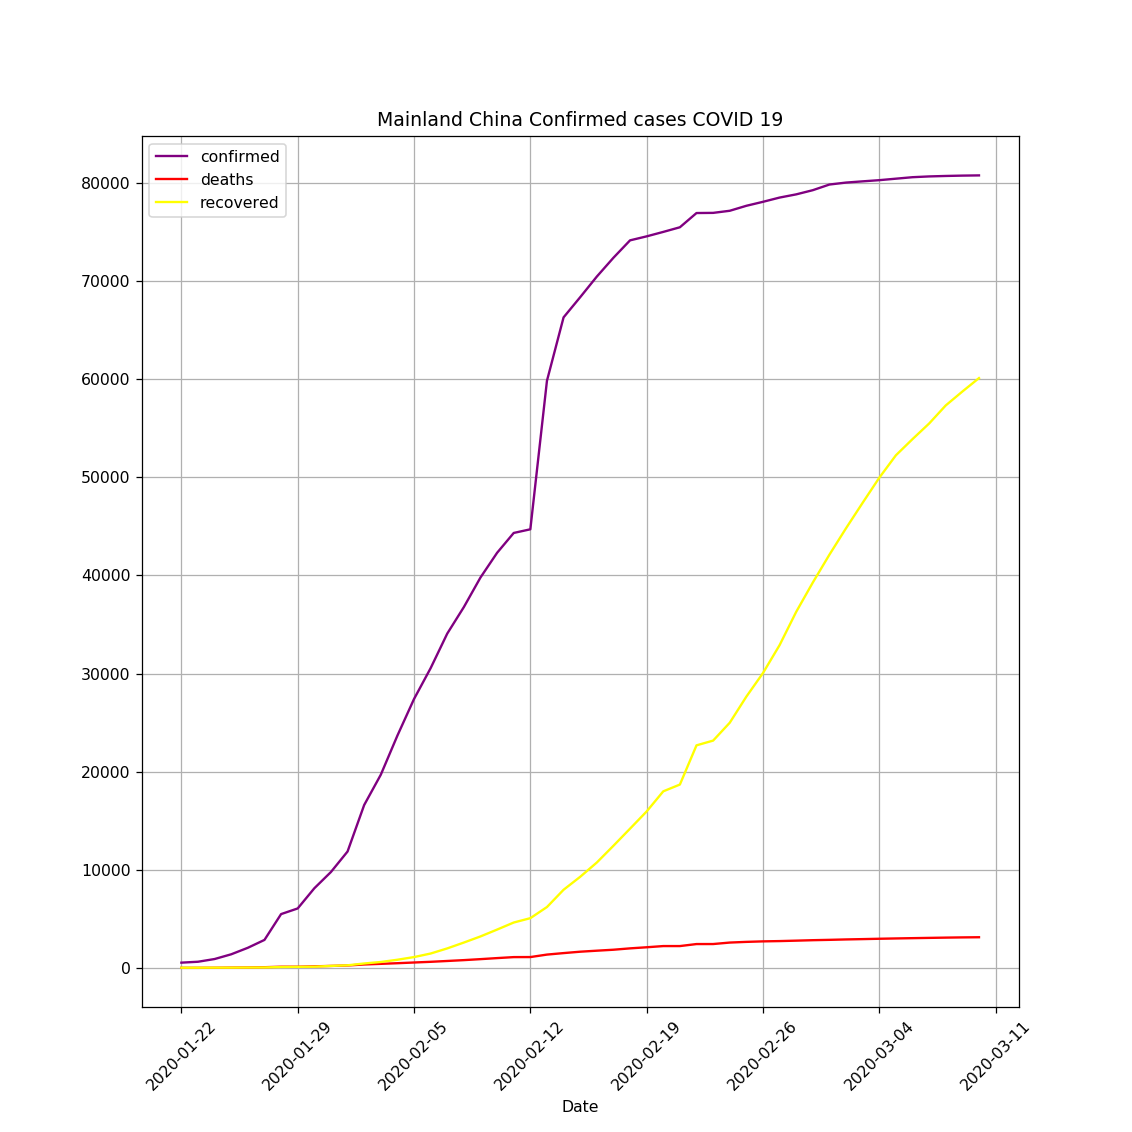

In [96]:
import matplotlib.pyplot as plt
%matplotlib notebook 
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
confirmedLine, = ax.plot(covid_19_data_countryFiltered['ObservationDate'],
                    covid_19_data_countryFiltered['Confirmed'],
                    color='purple')
confirmedLine.set_label('confirmed')

deathsLine, = ax.plot(covid_19_data_countryFiltered['ObservationDate'],
                    covid_19_data_countryFiltered['Deaths'],
                    color='red')
deathsLine.set_label('deaths')

recoveredLine, = ax.plot(covid_19_data_countryFiltered['ObservationDate'],
                    covid_19_data_countryFiltered['Recovered'],
                    color='yellow')
recoveredLine.set_label('recovered')

# Set title and labels for axes
ax.set(xlabel="Date",
       title=_COUNTRY_covid_19_data + " Confirmed cases COVID 19")

ax.legend()
ax.grid(True)

plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


In [82]:
covid_19_data_countryFiltered

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,547.0,17.0,28.0
1,2020-01-23,639.0,18.0,30.0
2,2020-01-24,916.0,26.0,36.0
3,2020-01-25,1399.0,42.0,39.0
4,2020-01-26,2062.0,56.0,49.0
5,2020-01-27,2863.0,82.0,58.0
6,2020-01-28,5494.0,131.0,101.0
7,2020-01-29,6070.0,133.0,120.0
8,2020-01-30,8124.0,171.0,135.0
9,2020-01-31,9783.0,213.0,214.0


In [97]:
covid_19_open_line_list_countryFiltered[covid_19_open_line_list_countryFiltered['date_confirmation'].eq('24.02.2020')].shape

(5, 44)

In [101]:
covid_19_open_line_list_countryFiltered[covid_19_open_line_list_countryFiltered['date_confirmation'].eq('22.01.2020')]

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
ID,,,,,,,,,,,,,,,,,,,,,
1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,18.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,42,female,Fuyang City,Anhui,China,1.0,32.91880,115.7036,admin2,21.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.0,33,female,Changping District,Beijing,China,1.0,40.20789,116.2063,admin3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,45,male,Shijingshan District,Beijing,China,1.0,39.92715,116.1737,admin3,19.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28.0,42,male,Xicheng District,Beijing,China,1.0,39.91093,116.3591,admin3,20.01.2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29.0,33,female,NaN,Beijing,China,1.0,40.18535,116.4151,admin1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58.0,NaN,NaN,Fuling District,Chongqing,China,1.0,29.66086,107.3324,admin3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59.0,NaN,NaN,Yongchuan District,Chongqing,China,1.0,29.29301,105.8705,admin3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80.0,70,male,Fuzhou City,Fujian,China,1.0,26.05196,119.1789,admin2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
